# DATA ANALYSIS OF GOOGLE APP'S RATINGS

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# getting data

df=pd.read_csv('GoogleAppStoreDataSet.csv')

## Exploring Features

- App
- Category
- Rating (Dependent)
- Installs
- Price
- Content Rating

In [3]:
df.head()

,App,Category,Rating,Installs,Price,Content Rating
0,Ai illustrator viewer,ART_AND_DESIGN,3.4,"100,000+",0,Everyone
1,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,"5,000+",0,Everyone
2,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,ART_AND_DESIGN,4.0,"1,000+",0,Everyone
3,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,"10,000,000+",0,Everyone
4,Cardi B Wallpaper,ART_AND_DESIGN,4.8,"50,000+",0,Everyone


In [4]:
df.shape

(1796, 6)

In [5]:
df.describe()

,Rating
count,1708.000000
mean,4.210363
std,0.473817
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1796 non-null   object 
 1   Category        1796 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1796 non-null   object 
 4   Price           1796 non-null   object 
 5   Content Rating  1796 non-null   object 
dtypes: float64(1), object(5)
memory usage: 84.3+ KB


In [7]:
df.isnull().sum()

App                0
Category           0
Rating            88
Installs           0
Price              0
Content Rating     0
dtype: int64

## Data Cleaning

#### Rating

In [8]:
# taking only 'Rating' not null rows into dataframe

df = df[df['Rating'].notna()]

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Installs          0
Price             0
Content Rating    0
dtype: int64

In [10]:
df.shape

(1708, 6)

#### Installs

In [11]:
df['Installs'].value_counts()

1,000,000+        335
10,000,000+       245
100,000+          214
10,000+           150
5,000,000+        144
500,000+          100
1,000+             99
100,000,000+       95
50,000+            89
5,000+             75
50,000,000+        57
500+               36
100+               36
500,000,000+       18
1,000,000,000+     15
Name: Installs, dtype: int64

In [12]:
# removing '+' and ',' from Installs column

df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))

In [13]:
df['Installs'].value_counts()

1000000       335
10000000      245
100000        214
10000         150
5000000       144
500000        100
1000           99
100000000      95
50000          89
5000           75
50000000       57
500            36
100            36
500000000      18
1000000000     15
Name: Installs, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   object 
 4   Price           1708 non-null   object 
 5   Content Rating  1708 non-null   object 
dtypes: float64(1), object(5)
memory usage: 93.4+ KB


In [15]:
# converting type of Installs from object to integer

df['Installs']=pd.to_numeric(df['Installs'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   int64  
 4   Price           1708 non-null   object 
 5   Content Rating  1708 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.4+ KB


#### Price

In [17]:
# stripping $ sign

df['Price']=df['Price'].apply(lambda x: x.strip('$'))

In [18]:
df['Price']=pd.to_numeric(df['Price'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1795
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1708 non-null   object 
 1   Category        1708 non-null   object 
 2   Rating          1708 non-null   float64
 3   Installs        1708 non-null   int64  
 4   Price           1708 non-null   float64
 5   Content Rating  1708 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 93.4+ KB


## Exploratory Data Analysis

In [20]:
df.describe()

,Rating,Installs,Price
count,1708.000000,1.708000e+03,1708.000000
mean,4.210363,2.337989e+07,0.263759
std,0.473817,1.073932e+08,1.682448
min,1.000000,1.000000e+02,0.000000
25%,4.000000,5.000000e+04,0.000000
50%,4.300000,1.000000e+06,0.000000
75%,4.500000,1.000000e+07,0.000000
max,5.000000,1.000000e+09,39.990000


Mean value for Rating is 4.21 whereas Median value is 4.30. Mean value for Price column is $0.263. Mean value for Installs is 1 million+.

In [21]:
# finding mode for 'Content Rating' 

df['Content Rating'].mode()

0    Everyone
dtype: object

In [22]:
# finding mode for 'Category' 

df['Category'].mode()

0    FAMILY
dtype: object

Most occuring value for Category is 'Family' and for Content Rating category is 'Everyone'.

In [23]:
# finding range of Price

df['Price'].max()-df['Price'].min()

39.99

In [24]:
# finding standard deviation

df.std()

Rating      4.738174e-01
Installs    1.073932e+08
Price       1.682448e+00
dtype: float64

In [25]:
# finding variance

df.var()

Rating      2.245030e-01
Installs    1.153330e+16
Price       2.830632e+00
dtype: float64

Standard Deviation tells us how spread out numbers are. For Price, the standard deviation is 1.682 and the variance is 2.830.

In [26]:
# First quartile (Q1) of Installs
Q1 = np.percentile(df['Installs'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) of Installs
Q3 = np.percentile(df['Installs'], 75, interpolation = 'midpoint') 
  
# Interquartile range (IQR) of Installs
IQR = Q3 - Q1 

IQR

9950000.0

In [27]:
# First quartile (Q1) of Rating
Q1 = np.percentile(df['Rating'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) of Rating
Q3 = np.percentile(df['Rating'], 75, interpolation = 'midpoint') 
  
# Interquartile range (IQR) of Rating
IQR = Q3 - Q1 

IQR

0.5

The Inter Quartile Range for “Installs” is 9.95 million and “Rating” is 0.5. The interquartile range tells us how far apart the first and third quartile are. It indicates how spread out the middle 50% of our set of data is.

In [28]:
#finding kurtosis
df.kurtosis()

Rating        6.413741
Installs     61.424869
Price       230.136725
dtype: float64

In [29]:
#finding skewness on columns
df.skew(axis = 0)

Rating      -1.906738
Installs     7.552619
Price       12.711100
dtype: float64

'Rating' is Left Skewed or Negatively Skewed and its median value is 4.3.  Kurtosis is around 6.4 for 'Rating' that means data is above normal distribution ands it has large outliers. 'Installs' is Positive Skewed with Kurtosis around 61.4. 'Price' is also Positive Skewed with Kurtosis around 230. 

## Some Findings

In [30]:
print("Number of Apps with 5 ratings : ",df['Rating'][df['Rating'] == 5].count())

Number of Apps with 5 ratings :  24


#### There are 24 Apps in the store which has 5.0 Ratings.

In [31]:
# Finding costliest App

df[df['Price']==df['Price'].max()]

,App,Category,Rating,Installs,Price,Content Rating
1057,LTC AS Legal,MEDICAL,4.0,100,39.99,Everyone


In [32]:
print("The costliest App in the Store is : ",df['App'][df['Price']==df['Price'].max()])

The costliest App in the Store is :  1057    LTC AS Legal
Name: App, dtype: object


#### The most costly App in the Store is : LTC AS Legal costing $39.99.

In [33]:
print("Free apps in the Playstore is : ",df['App'][df['Price']==0].count())

Free apps in the Playstore is :  1613


Number of free apps in the Playstore is 1613.

## Univariate Analysis

Text(0, 0.5, 'Number of Apps')

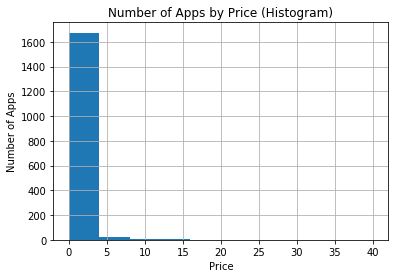

In [34]:
df['Price'].hist()
plt.title('Number of Apps by Price (Histogram)')
plt.xlabel('Price')
plt.ylabel('Number of Apps')

Text(0, 0.5, 'Frequency')

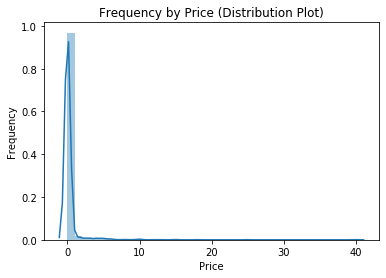

In [35]:
sns.distplot(df['Price'])
plt.title('Frequency by Price (Distribution Plot)')
plt.xlabel('Price')
plt.ylabel('Frequency')

Price is right skewed/positively skewed and the mean of Price values is typically greater than the median. More than 1600 Apps are free apps.

Text(0, 0.5, 'Frequency')

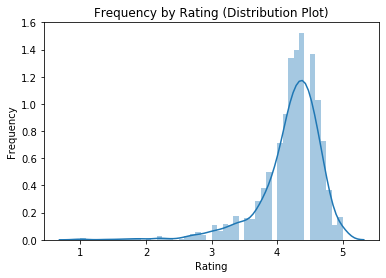

In [36]:
sns.distplot(df['Rating'])
plt.title('Frequency by Rating (Distribution Plot)')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Rating has negatively skewed data with mode value of 4.3

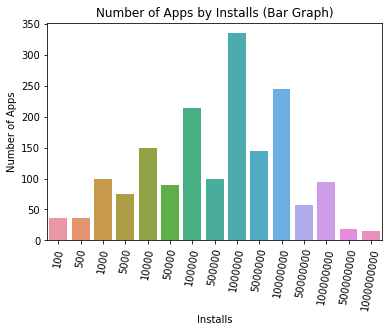

In [37]:
sns.countplot(df['Installs'])
plt.xticks(rotation=80)
plt.title('Number of Apps by Installs (Bar Graph)')
plt.xlabel('Installs')
plt.ylabel('Number of Apps')
plt.show()

The Installs category of 1 million + has the highest number of apps, whereas, the Installs category of 1 billion + has the lowest number of apps.

## Understanding 'Content Rating'

In [38]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+'], dtype=object)

In [39]:
df['Content Rating'].value_counts()

Everyone        1374
Teen             196
Mature 17+        81
Everyone 10+      57
Name: Content Rating, dtype: int64

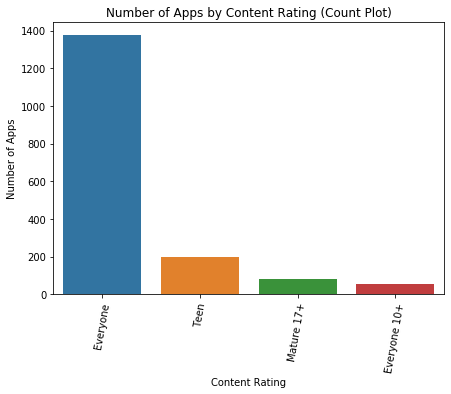

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(df['Content Rating'])
plt.xticks(rotation=80)
plt.title('Number of Apps by Content Rating (Count Plot)')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

Text(0.5, 1.0, 'Share of % of Content Rating (Pie Chart)')

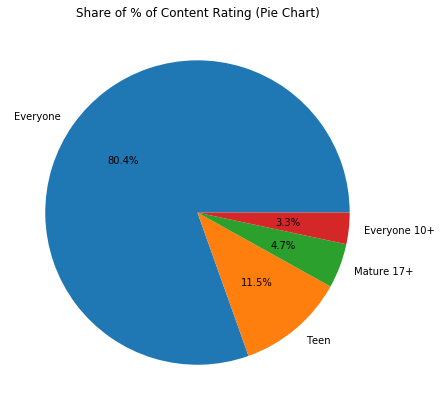

In [41]:
plt.figure(figsize=(12,7))
label=['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+']
plt.pie(df['Content Rating'].value_counts(), labels=label, autopct='%.1f%%') #display % till 1 decimal place
plt.title('Share of % of Content Rating (Pie Chart)')

#### Content Rating category 'EVERYONE' has the maximum share percentage of around 80.4%, whereas, Content Rating category 'EVERYONE 10+'  has the least share percentage of 3.3%. Number of apps under 'EVERYONE' is 1374.

Text(0.5, 0, 'Number of Apps')

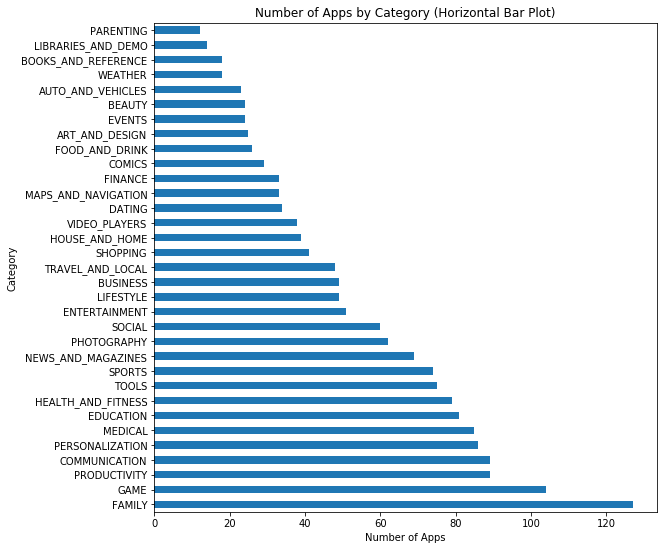

In [42]:
df['Category'].value_counts().plot(kind='barh',figsize=(9,9))
plt.title('Number of Apps by Category (Horizontal Bar Plot)')
plt.ylabel('Category')
plt.xlabel('Number of Apps')

#### The horizontal bar plot shows that the maximum number of apps belong to the Family Category, followed by Game category. The least number of apps belong to the Parenting category.

## Bivariate Analysis

In [43]:
df2 = df.groupby(['Category']).agg({'Rating':'mean'}).reset_index().sort_values(by='Rating')
df2

,Category,Rating
12,FINANCE,3.984848
19,MAPS_AND_NAVIGATION,4.012121
9,ENTERTAINMENT,4.045098
31,VIDEO_PLAYERS,4.097368
18,LIFESTYLE,4.108163
11,FAMILY,4.120472
6,COMMUNICATION,4.133708
17,LIBRARIES_AND_DEMO,4.135714
26,SHOPPING,4.141463
15,HEALTH_AND_FITNESS,4.154430


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

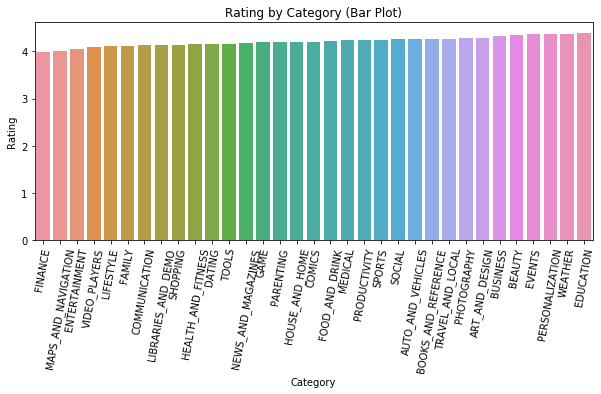

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(df2['Category'], df2['Rating'])
plt.title('Rating by Category (Bar Plot)')
plt.xticks(rotation=80)

#### 'EDUCATION' category has the highest mean rating followed by 'WEATHER' and 'PERSONALIZATION' categories. Meanwhile, 'FINANCE' category has the lowest mean rating.

In [45]:
df3 = df.groupby(['Content Rating']).agg({'Rating':'mean'}).reset_index().sort_values(by='Rating')
df3

,Content Rating,Rating
2,Mature 17+,4.198765
0,Everyone,4.205022
3,Teen,4.232653
1,Everyone 10+,4.278947


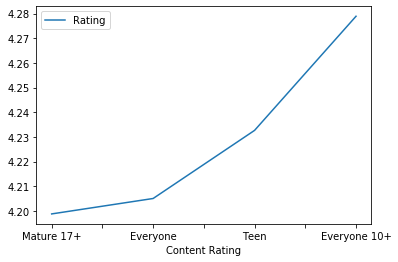

In [46]:
df3.plot(x ='Content Rating', y='Rating', kind = 'line')
plt.show()

Apps with 'Everyone 10+' category has the highest mean rating and 'Mature 17+' has the lowest mean rating.

Text(0.5, 1.0, 'Rating by Content Rating (Box Plot)')

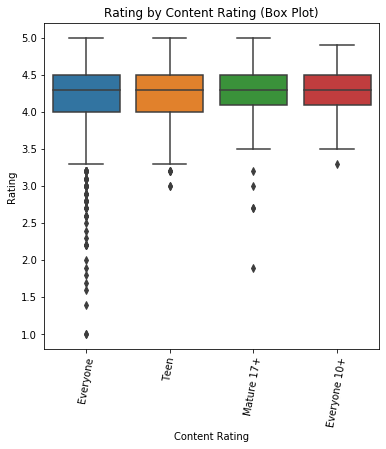

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(df['Content Rating'], df['Rating'])
plt.xticks(rotation=80)
plt.title('Rating by Content Rating (Box Plot)')

#### Inter quartile range for Everyone and Teen categories is greater than Mature 17+ and Everyone 10+ categories. It means Everyone and Teen has more dispersed data.

Text(0.5, 1.0, 'Rating by Content Rating (Box Plot)')

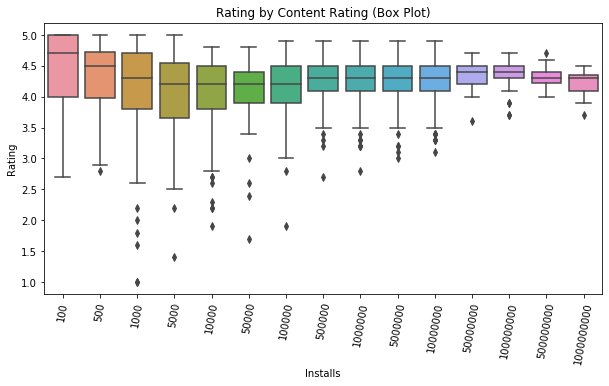

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Installs'], df['Rating'])
plt.xticks(rotation=80)
plt.title('Rating by Content Rating (Box Plot)')

#### The apps in the category of 100+ installs has the highest rating median value.

In [49]:
df4 = df.groupby(['Content Rating']).agg({'Price':'mean'}).reset_index().sort_values(by='Price')
df4

,Content Rating,Price
3,Teen,0.135000
1,Everyone 10+,0.175439
2,Mature 17+,0.221852
0,Everyone,0.288261


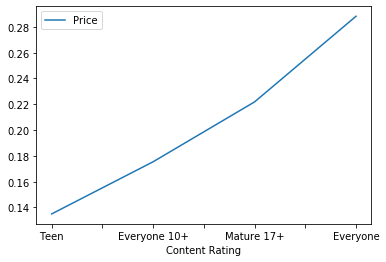

In [50]:
df4.plot(x ='Content Rating', y='Price', kind = 'line')
plt.show()

Apps having Content Rating 'Teen' has lowest average Price, where as, 'Everyone' category has highest average price.

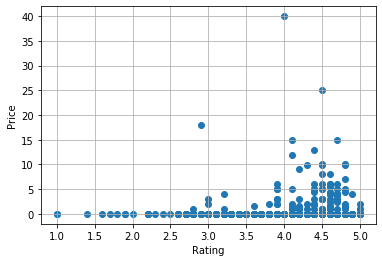

In [51]:
plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid()
plt.show()

Majority of the apps priced above $10 has a rating between 4 to 5.

## Summary

The objective of the project was to analyze the data and provide insights, which would help the android developers to understand the factors behind the ratings of any app.
Majority of the apps were found to be lying in the region of 1 million plus installs. Content rating category “Everyone” has the maximum share percentage and also the highest average pricing. The most number of apps belong to the Family category, while Education category has the highest mean rating.

'Finance' category has 34 apps with lowest mean rating of 3.98 among all. So for any new app in Finance domain, there's a risk that it might not be taken well among the users.
Even though 'Weather' category has very less number of apps, it has good second highest mean rating. So generally people likes the existing Weather related apps. 